In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

DF=pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


# 탐색적 데이터 분석

## 빈도분석

In [4]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

## 분포 시각화

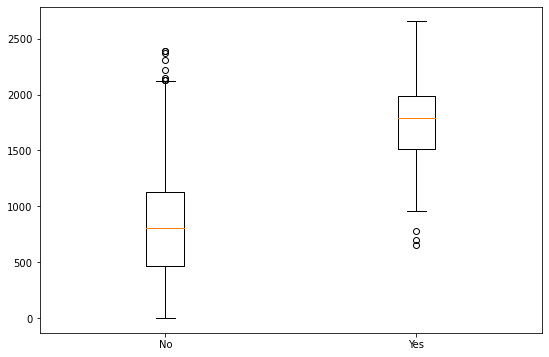

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.default=='No'].balance,
            DF[DF.default=='Yes'].balance],
            labels = ['No','Yes'])
plt.show()

# Data Preprocessing 

##  Standardization

In [10]:
X=DF[['balance']]
y=DF['default']

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled=scaler.fit_transform(X)

X_Scaled[:5]

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       [-0.6328925 ],
       [-0.10279088]])

##  Train & Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_Scaled,y,
                                       test_size = 0.3,
                                       random_state = 2045)

print('Train Data : ',X_train.shape,y_train.shape)
print('Test Data : ',X_test.shape,y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# Modeling

## Train_Data로 모델 생성

In [13]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train,y_train)

LogisticRegression()

## Test_Data에 Model 적용

In [15]:
y_hat=Model_lr.predict(X_test)

In [16]:
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Model Validation

##  Accuracy

In [17]:
Model_lr.score(X_train, y_train)

0.9724285714285714

In [18]:
Model_lr.score(X_test, y_test)

0.9736666666666667

## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2889,    7],
       [  72,   32]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat,labels=['Yes','No'])

array([[  32,   72],
       [   7, 2889]], dtype=int64)

## Accuracy, Precision, Recall - 'No(상환)'

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label='No'))
print(recall_score(y_test, y_hat, pos_label='No'))

0.9736666666666667
0.9756838905775076
0.9975828729281768


## Accuracy, Precision, Recall - 'Yes(연체)'

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label='Yes'))
print(recall_score(y_test, y_hat, pos_label='Yes'))

0.9736666666666667
0.8205128205128205
0.3076923076923077


## F1_Score - 'No(상환)'

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label='No')

0.9865118661430767

## F1_Score - 'Yes(연체)'

In [24]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label='Yes')

0.44755244755244755

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat,
                            target_names=['No','Yes'],
                            digits=5))

              precision    recall  f1-score   support

          No    0.97568   0.99758   0.98651      2896
         Yes    0.82051   0.30769   0.44755       104

    accuracy                        0.97367      3000
   macro avg    0.89810   0.65264   0.71703      3000
weighted avg    0.97030   0.97367   0.96783      3000



#The End#